In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
curr = pd.read_excel(r'C:\Users\hp\Documents\Time Series\Currency.xlsx', index_col='Date', parse_dates=True)

In [3]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012


In [4]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011


In [5]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2023-03-08 to 2015-01-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
 1   Open    1968 non-null   float64
 2   High    1968 non-null   float64
 3   Low     1968 non-null   float64
 4   Volume  1968 non-null   object 
 5   Chg%    1968 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.6+ KB


In [6]:
curr = curr.sort_index(ascending=[True])

In [7]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011


In [8]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011


In [9]:
curr.drop(['Open', 'High', 'Low', 'Volume', 'Chg%'], axis=1, inplace=True)

In [10]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [11]:
curr.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [12]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2015-01-30 to 2023-03-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [13]:
curr = curr.resample('D').ffill()

#upsampled = series.resample('D')
#interpolated = upsampled.interpolate(method='linear')

In [14]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-01-31,62.23
2015-02-01,62.23
2015-02-02,62.12
2015-02-03,61.99


In [15]:
curr.tail()

,Price
Date,
2023-03-04,82.07
2023-03-05,82.07
2023-03-06,82.03
2023-03-07,82.03
2023-03-08,82.12


In [16]:
curr_train = curr.loc[:'2022']
curr_test  = curr.loc['2023':]

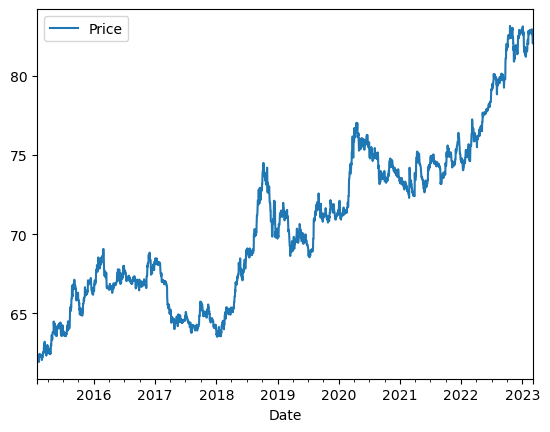

In [17]:
fig, ax = plt.subplots()
curr.plot(ax=ax)
plt.show()

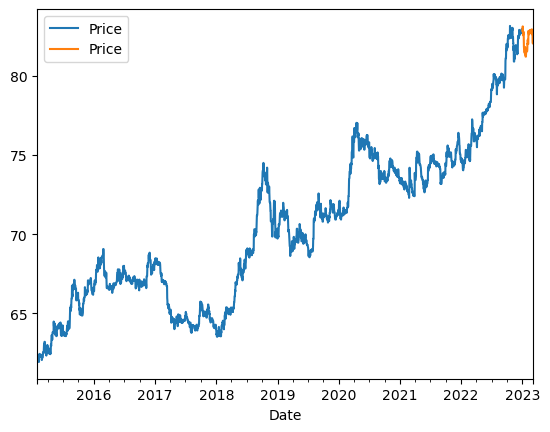

In [18]:
fig, ax1 = plt.subplots()
curr_train.plot(ax=ax1)
curr_test.plot(ax=ax1)
plt.show()

In [19]:
result = adfuller(curr)
print(result)

(-0.6216087748097786, 0.8660241941109355, 16, 2943, {'1%': -3.432573925543589, '5%': -2.862522583517131, '10%': -2.567293056224339}, -1146.9678669668883)


In [20]:
result = adfuller(curr.diff().dropna())
print(result)

(-12.5496211509747, 2.2207712386244107e-23, 15, 2943, {'1%': -3.432573925543589, '5%': -2.862522583517131, '10%': -2.567293056224339}, -1147.1317917850456)


In [21]:
result = adfuller(np.sqrt(curr))
print(result)

(-0.6969333850749431, 0.8475422620025004, 16, 2943, {'1%': -3.432573925543589, '5%': -2.862522583517131, '10%': -2.567293056224339}, -17726.537342833937)


In [22]:
result = adfuller(np.log(curr))
print(result)

(-0.6249012074903857, 0.8652555238866136, 2, 2957, {'1%': -3.432563387143659, '5%': -2.8625179291294662, '10%': -2.5672905782716513}, -26166.739744477505)


In [23]:
curr_diff = curr.diff().dropna()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


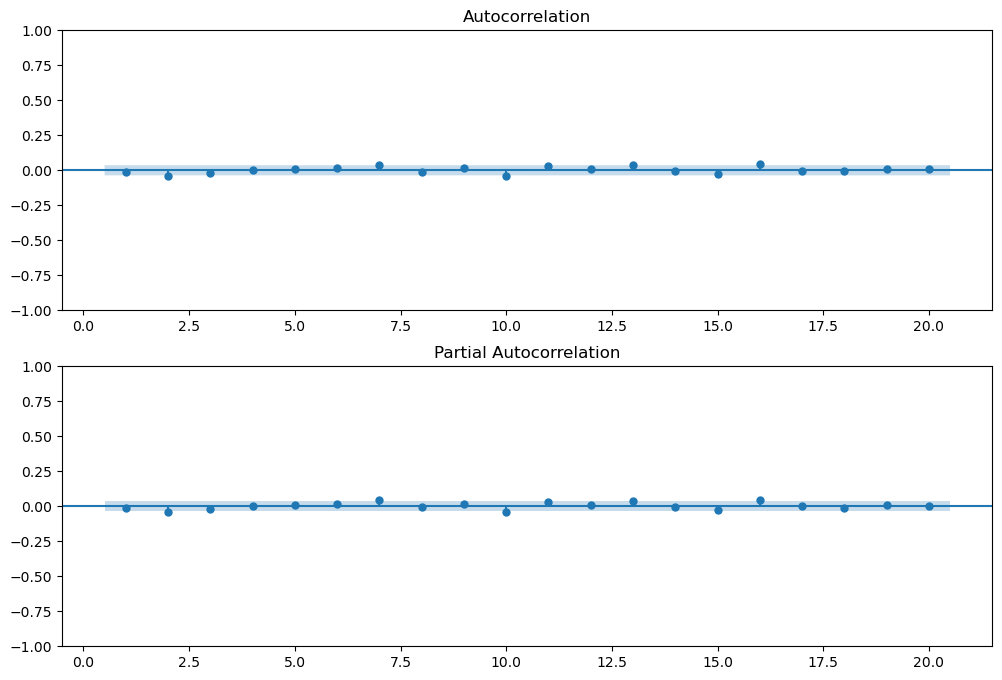

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(curr_diff, lags=20, zero=False, ax=ax1)

plot_pacf(curr_diff, lags=20, zero=False, ax=ax2)

plt.show()

In [25]:
order_aic_bic=[]


            
            
for p in range(5):
    for q in range(5):
        try:
            model = ARIMA(curr, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels

In [26]:
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

print(order_df.sort_values('aic'))

    p  q          aic          bic
12  2  2 -1191.803381 -1161.840348
24  4  4 -1189.027073 -1135.093613
18  3  3 -1179.980360 -1138.032114
19  3  4 -1179.331534 -1131.390681
2   0  2 -1174.116184 -1156.138364
10  2  0 -1174.044731 -1156.066911
15  3  0 -1173.067053 -1149.096627
0   0  0 -1172.953288 -1166.960681
3   0  3 -1172.884707 -1148.914280
11  2  1 -1172.727554 -1148.757128
9   1  4 -1172.652600 -1136.696960
7   1  2 -1172.578687 -1148.608261
6   1  1 -1171.840163 -1153.862344
1   0  1 -1171.545018 -1159.559805
5   1  0 -1171.498472 -1159.513258
4   0  4 -1171.113808 -1141.150775
20  4  0 -1171.103236 -1141.140202
14  2  4 -1171.069309 -1129.121063
16  3  1 -1171.063832 -1141.100799
8   1  3 -1170.984914 -1141.021880
23  4  3 -1169.396470 -1121.455617
17  3  2 -1169.214513 -1133.258873
21  4  1 -1169.104367 -1133.148727
13  2  3 -1169.063204 -1133.107564
22  4  2 -1167.118971 -1125.170725


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


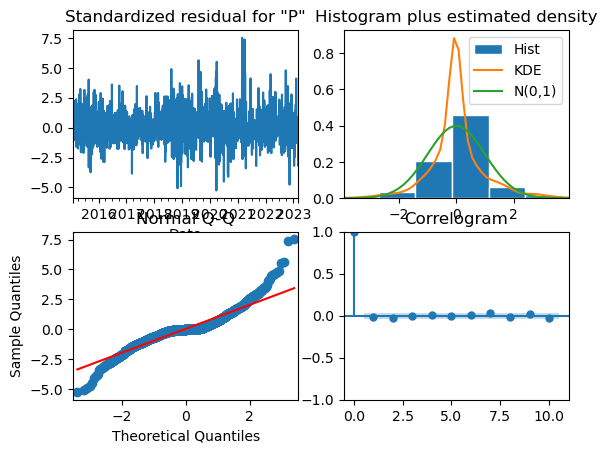

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2960
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 600.902
Date:                Tue, 04 Apr 2023   AIC                          -1191.803
Time:                        21:55:40   BIC                          -1161.840
Sample:                    01-30-2015   HQIC                         -1181.018
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2456      0.002    573.774      0.000       1.241       1.250
ar.L2         -0.9971      0.002   -504.103      0.000      -1.001      -0.993
ma.L1         -1.2520      0.002   -505.763      0.0

In [27]:
model = ARIMA(curr, order=(2,1,2))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [28]:
order_aic_bic2=[]


            
            
for p in range(5,9):
    for q in range(5,9):
        try:
            model = ARIMA(curr, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic2.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood op

In [29]:
order_df2 = pd.DataFrame(order_aic_bic2, columns=['p', 'q', 'aic', 'bic'])

print(order_df2.sort_values('aic'))

    p  q          aic          bic
0   5  5 -1180.651008 -1114.732335
5   6  6 -1176.850388 -1098.946502
1   5  6 -1174.961693 -1103.050413
15  8  8 -1174.894123 -1073.019810
2   5  7 -1174.758572 -1096.854685
3   5  8 -1173.921650 -1090.025157
8   7  5 -1173.658096 -1095.754209
6   6  7 -1172.196612 -1088.300118
7   6  8 -1172.050562 -1082.161462
4   6  5 -1171.860723 -1099.949443
11  7  8 -1171.468028 -1075.586322
12  8  5 -1170.723700 -1086.827207
10  7  7 -1169.407615 -1079.518515
9   7  6 -1168.694459 -1084.797966
13  8  6 -1164.523401 -1074.634302
14  8  7 -1146.525001 -1050.643295


In [30]:
order_aic_bic3=[]
            
for p in range(9,12):
    for q in range(9,12):
        try:
            model = ARIMA(curr, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic3.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood op

In [31]:
order_df3 = pd.DataFrame(order_aic_bic3, columns=['p', 'q', 'aic', 'bic'])

print(order_df3.sort_values('aic'))

    p   q          aic          bic
0   9   9 -1167.801337 -1053.941810
3  10   9 -1165.410274 -1045.558141
1   9  10 -1165.228175 -1045.376042
2   9  11 -1164.991947 -1039.147208
8  11  11 -1164.191211 -1026.361258
4  10  10 -1163.951071 -1038.106331
6  11   9 -1163.748939 -1037.904199
5  10  11 -1163.232944 -1031.395598
7  11  10 -1161.359625 -1029.522279


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


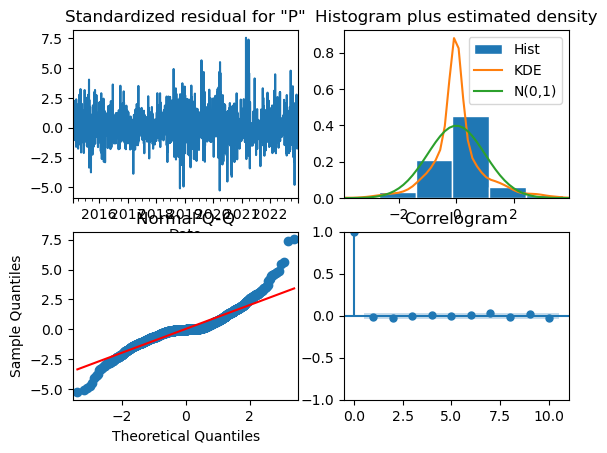

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2893
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 590.440
Date:                Tue, 04 Apr 2023   AIC                          -1170.881
Time:                        22:06:34   BIC                          -1141.032
Sample:                    01-30-2015   HQIC                         -1160.124
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2459      0.002    627.249      0.000       1.242       1.250
ar.L2         -0.9979      0.002   -564.750      0.000      -1.001      -0.994
ma.L1         -1.2507      0.003   -460.981      0.0

In [33]:
model = ARIMA(curr_train, order=(2,1,2))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [38]:
forecast = results.get_forecast(steps=len(curr_test), dynamic=True)
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
dates = curr_test.index

In [35]:
print(len(curr_test))

67


In [36]:
print(len(mean))

67


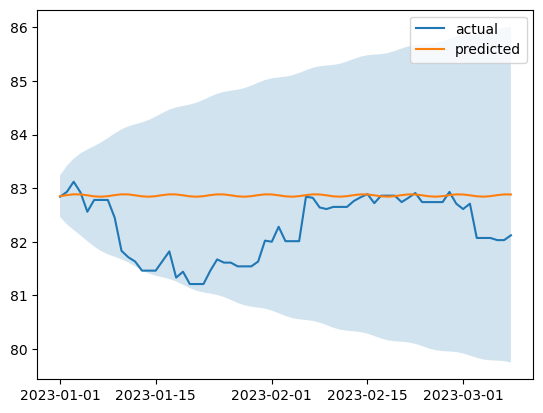

In [39]:
plt.figure()

plt.plot(curr_test.index, curr_test, label='actual')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates,conf_int['lower Price'], conf_int['upper Price'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [40]:
rms = sqrt(mean_squared_error(curr_test.Price,mean))
print(rms)

0.8362722290392461
